Akanksha Wagh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf


data = pd.read_csv('EE627A_HW1_Data.csv')

In [2]:
data.head()

,Date,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,192701,-0.10,-0.09,4.72,0.25,0.36,-0.70,0.57,-0.33,2.46,...,1.88,2.08,-1.45,-2.60,1.44,-17.93,-3.34,1.53,-2.48,-4.13
1,192702,4.32,0.31,3.40,0.26,-1.67,4.29,12.83,1.58,1.43,...,3.97,8.90,4.85,5.21,5.20,3.49,4.48,6.81,2.77,0.30
2,192703,0.33,-1.77,-2.42,0.30,2.97,1.98,-13.56,5.55,0.57,...,5.56,-7.80,4.30,-8.39,1.06,-20.47,3.05,-2.44,1.41,2.28
3,192704,0.42,0.30,1.03,0.25,4.53,2.60,2.85,4.09,-3.34,...,-2.08,3.44,3.10,4.43,0.77,-10.75,2.09,6.02,3.76,4.71
4,192705,5.36,0.67,3.41,0.30,3.41,6.14,11.62,11.87,-0.50,...,3.35,18.33,5.10,5.66,6.69,-4.01,0.49,4.69,10.25,1.40


In [25]:
# To find correlation matrix between Market-Risk free, Small minus big, high minus low, Risk free rate, Momentum

columns_for_correlation = ['Mkt-RF', 'SMB', 'HML', 'RF', 'Mom'] + list(data.columns[5:])
correlation_matrix = data[columns_for_correlation].corr()

Text(0.5, 1.0, 'Correlation Matrix')

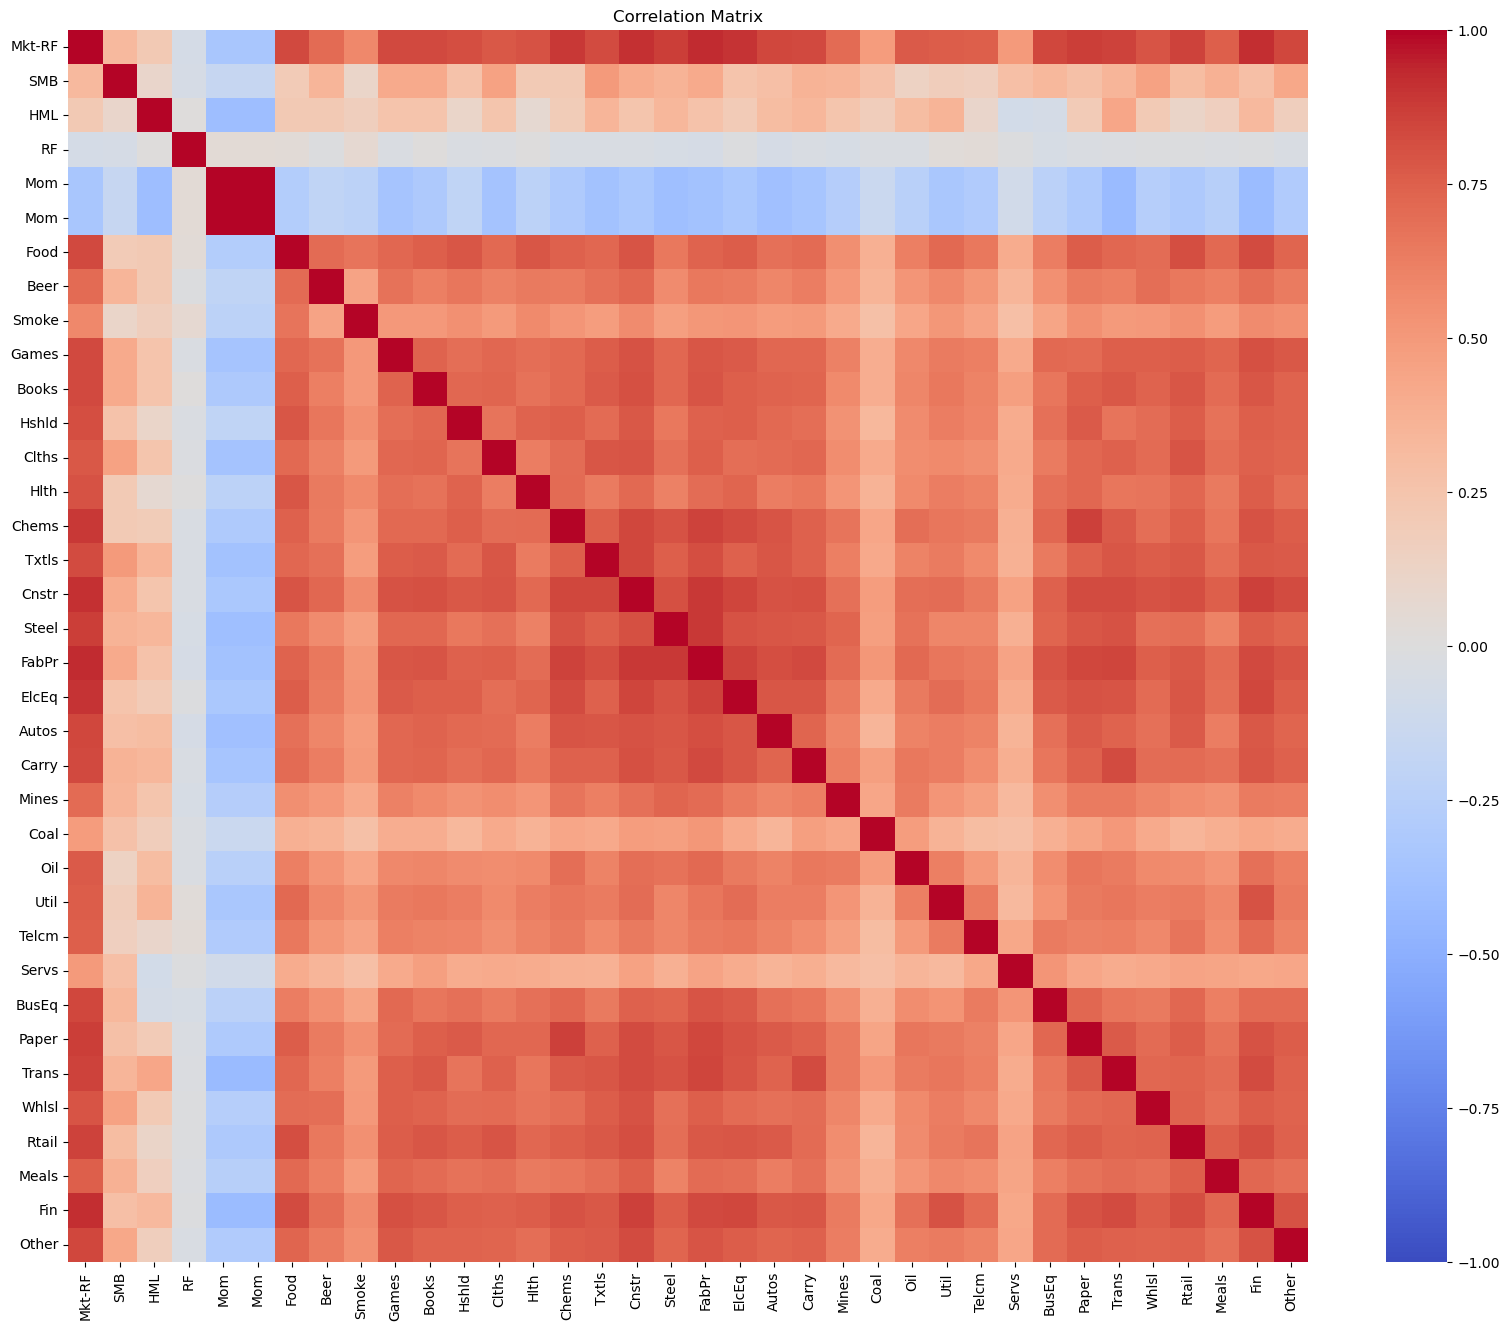

In [26]:
# To lot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

In [27]:
# To find the factor that correlates most highly with every industry
industry_columns = data.columns[5:]
factor_columns = ['Mkt-RF', 'SMB', 'HML', 'Mom']
max_correlations = correlation_matrix.loc[factor_columns, industry_columns].max()
max_corr_factor = max_correlations.idxmax()

In [28]:
# To find the factor that correlates negatively with every industry
min_correlations = correlation_matrix.loc[factor_columns, industry_columns].min()
negative_corr_factor = min_correlations[min_correlations < 0].idxmin() if any(min_correlations < 0) else "No factor"


In [29]:
# To check RF correlation with industry time series
rf_correlations = correlation_matrix.loc['RF', industry_columns]
high_rf_correlation = rf_correlations.abs().mean() > 0.5


In [30]:
print(f"Factor correlating most highly with every industry: {max_corr_factor}")
print(f"Factor correlating negatively with every industry: {negative_corr_factor}")
print(f"RF correlates highly with industry time series: {'Yes' if high_rf_correlation else 'No'}")

Factor correlating most highly with every industry: Mom
Factor correlating negatively with every industry: Trans
RF correlates highly with industry time series: No


The correlation matrix heatmap is a representation of the relationships between the factors and industry returns.

Factor correlations:

The factor which is most highly correlated with every industry is FabPr (Fabricated Products).

The factor which is negatively correlated with every industry is Trans (Transportation).

RF does not correlate highly with industry time series.

In [31]:
# To compute ACF for the four-factor model
factors = ['Mkt-RF', 'SMB', 'HML', 'Mom']
lags = range(1, 11)


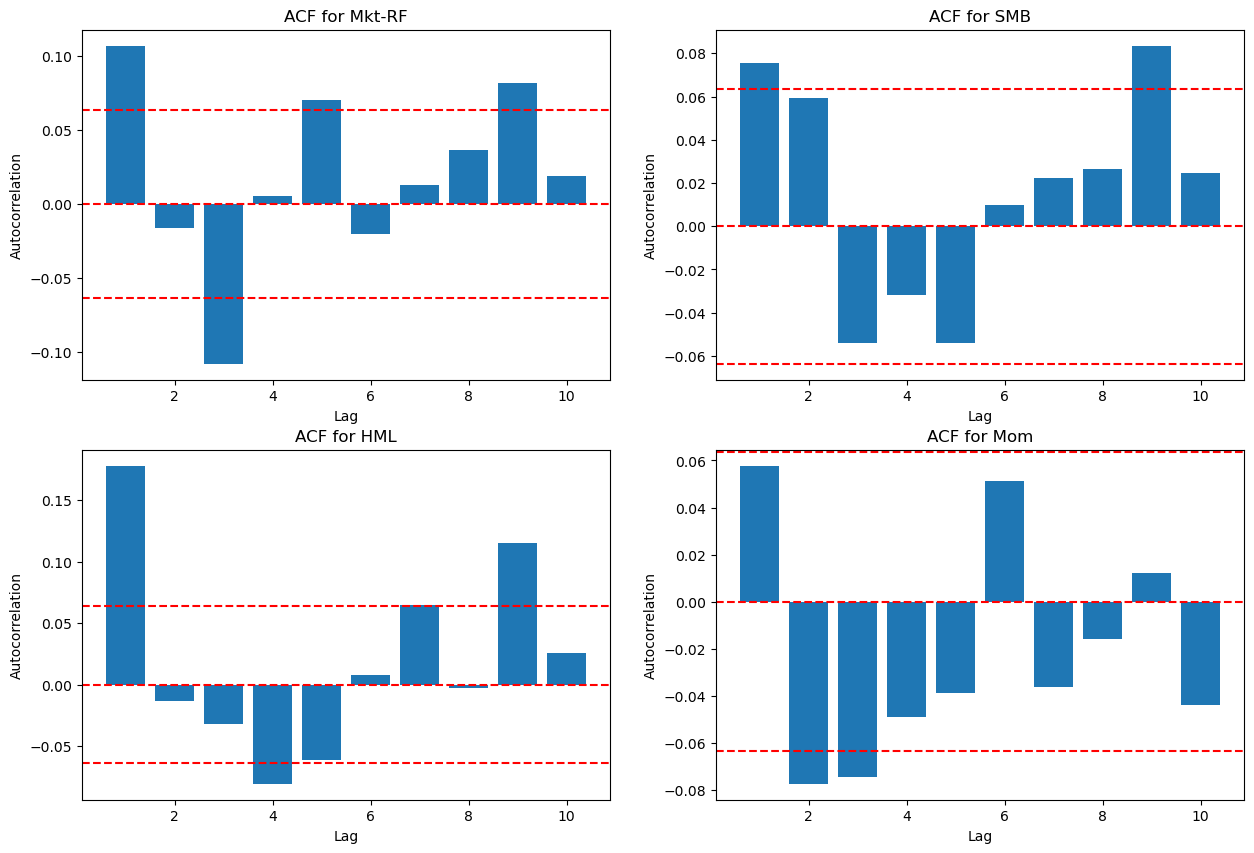

In [32]:
plt.figure(figsize=(15, 10))
for i, factor in enumerate(factors, 1):
    acf_values = acf(data[factor], nlags=10)
    plt.subplot(2, 2, i)
    plt.bar(lags, acf_values[1:])
    plt.title(f'ACF for {factor}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.axhline(y=1.96/np.sqrt(len(data)), color='r', linestyle='--')
    plt.axhline(y=-1.96/np.sqrt(len(data)), color='r', linestyle='--')


In [33]:
plt.tight_layout()
plt.savefig('acf_plots.png')
plt.close()

In [30]:
# To check for AR(1) model
ar1_threshold = 1.96 / np.sqrt(len(data))
ar1_factors = [factor for factor in factors if abs(acf(data[factor], nlags=1)[1]) > ar1_threshold]

print(f"Factors exhibiting AR(1) behavior: {', '.join(ar1_factors) if ar1_factors else 'None'}")

Factors exhibiting AR(1) behavior: Mkt-RF, SMB, HML


The four-factor model's autocorrelation function (ACF) is as follows:

Each of the four components (Mkt-RF, SMB, HML, and Mom) exhibits autocorrelation in the ACF plots with lags ranging from 1 to 10. The dashed red lines represent significance threshold (±1.96/√n).

AR(1) model presence: Mkt-RF, SMB, and HML are factors that display AR(1) behavior.

Notes:

AR(1) behavior is shown by Mkt-RF (Market minus Risk-free rate), SMB (Small minus Big), and HML (High minus Low). 

This means that these factors show significant autocorrelation at lag 1, indicating that their current values are influenced by their immediate past values.

Unlike the other components, the momentum factor (Mom) does not exhibit substantial AR(1) behavior, indicating that its current values are less dependent on its recent past values.

Mkt-RF, SMB, and HML all exhibit AR(1) behavior, which implies that these variables have some degree of short-term predictability that may be helpful for risk management or forecasting.

The efficient market hypothesis is supported by the Momentum factor's lack of AR(1) behavior, which implies that historical price fluctuations are not very predictive of future movements for this component.

It's crucial to remember that although while these variables exhibit AR(1) behavior, this doesn't always mean that financial markets are easily predictable or exploitable. When evaluating these results, other factors like market efficiency and transaction costs should be taken into account.

The time series characteristics of the four-factor model's component parts and the correlations between various factors and industry returns are both illuminated by these findings. Understanding market dynamics, evaluating risk, and possibly creating trading or investment strategies can all benefit from this knowledge.

